<a href="https://colab.research.google.com/github/zahra-sharifzadeh/pytorch/blob/main/02_pytorch_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. Neural Network Classification with PyTorch

## 1. Make classification data and get it ready

In [71]:
from sklearn.datasets import make_circles

# Make 100 samples

n_samples = 1000

# Create circles

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [72]:
len(X), len(y)

(1000, 1000)

In [73]:
print(f"First 5 samples of X:\n {X[:5]}")
print(f"First 5 samples of y:\n {y[:5]}")

First 5 samples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y:
 [1 1 1 1 0]


In [74]:
# Make DataFrame of circle data
import pandas as pd 
circles = pd.DataFrame({"X1": X[:,0],
                        "X2": X[:,1],
                        "label": y})

circles.head(10)                    

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


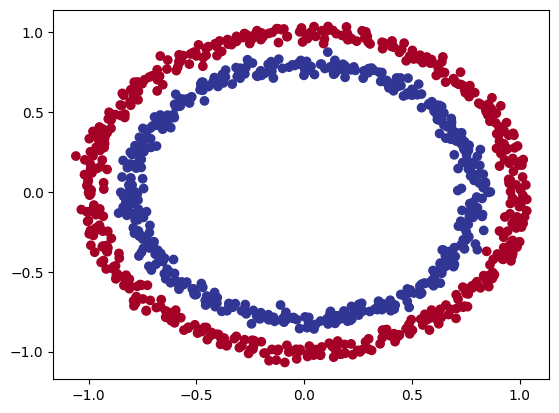

In [75]:
# Visualize
import matplotlib.pyplot as plt

plt.scatter(x=circles.X1, 
            y=circles.X2,
            c=y, cmap=plt.cm.RdYlBu)
plt.show()

###1.1 Check input output shape

In [76]:
X.shape , y.shape

((1000, 2), (1000,))

In [77]:
# View the first example of feature and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} , and the same for y: {y_sample}.")
print(f"Shapes for one sample of X: {X_sample.shape} , and the same for y: {y_sample.shape}.")

Values for one sample of X: [0.75424625 0.23148074] , and the same for y: 1.
Shapes for one sample of X: (2,) , and the same for y: ().


###1.2 Turn data into tensors and test and train split

In [78]:
import torch
torch.__version__

'1.13.1+cu116'

In [79]:
type(X) , X.dtype

(numpy.ndarray, dtype('float64'))

In [80]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [81]:
# Split data into training and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state=42)

In [82]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## 2. Building a model

In [83]:
import torch
from torch import nn

# Make device agnostic is code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [84]:
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()

    # Creat 2 linear layer
    self.laye_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 feat upscale it to 5 feat
    self.laye_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 feat downscale it to 1 feat ( same shape as y)
  # Define forward method for forward path
  def forward(self, x):
    return self.laye_2(self.laye_1(x)) # x -> layer_1 -> layer_2 -> out_put


# Instantiate
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (laye_1): Linear(in_features=2, out_features=5, bias=True)
  (laye_2): Linear(in_features=5, out_features=1, bias=True)
)

In [85]:
next(model_0.parameters()).device

device(type='cpu')

### 2.1 nn.Sequential()

In [86]:
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

### 2.2 subclassing with nn.Sequential()

In [87]:
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # creat two Linear layers

    self.two_Linear_layers = nn.Sequential(
        nn.Linear(in_features=2, out_features=5),
        nn.Linear(in_features=5, out_features=1)
    )
  # Define forward method for forward path
  def forward(self, x):
    return self.two_Linear_layers(x)

# Instantiate
model_0 = CircleModelV0().to(device)
model_0


CircleModelV0(
  (two_Linear_layers): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Linear(in_features=5, out_features=1, bias=True)
  )
)

In [88]:
model_0.state_dict()

OrderedDict([('two_Linear_layers.0.weight',
              tensor([[-0.4035, -0.2421],
                      [-0.5283,  0.2522],
                      [ 0.5473, -0.6657],
                      [ 0.1642,  0.3653],
                      [ 0.1282, -0.2518]])),
             ('two_Linear_layers.0.bias',
              tensor([ 0.3691,  0.3716,  0.2644, -0.1243, -0.1872])),
             ('two_Linear_layers.1.weight',
              tensor([[ 0.0478, -0.0790, -0.1333,  0.2859,  0.3843]])),
             ('two_Linear_layers.1.bias', tensor([-0.0443]))])

In [89]:
# Make Predictions
with torch.inference_mode():
  untraine_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untraine_preds)}, Shape: {untraine_preds.shape}.")
print(f"length of test samples: {len(X_test)}, Shape: {X_test.shape}.")
print(f"\nFirst 10 prediction:\n {torch.round(untraine_preds[:10])} ")
print(f"\nFirst 10 Labels:\n {y_test[:10]} ")

Length of predictions: 200, Shape: torch.Size([200, 1]).
length of test samples: 200, Shape: torch.Size([200, 2]).

First 10 prediction:
 tensor([[-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.]]) 

First 10 Labels:
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]) 


###2.3 set Loss function and optimizer

In [90]:
# Set up loss function
# loss_fn = nn.BCELoss() # require the input goes throguh sigmoid activation 
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLoitsLoss() = sigmoid activation function built in
#nn.BCEWithLogitsLoss() Numerically Stable

# Set up optimaizer 
optimizer = torch.optim.SGD(params=model_0.parameters(), 
                            lr= 0.01)

In [91]:
# Calculate accuracy
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

  

## 3. Training loop
raw logit -> prediction probablities -> predicton labes


logit: Raw out pit of model

In [92]:
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.1716],
        [-0.1357],
        [-0.2512],
        [-0.1491],
        [-0.2285]])

In [93]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [94]:
# Using sigmod for our model logits to turn the output to problisties
y_pred_prob = torch.sigmoid(y_logits)
y_pred_prob

tensor([[0.4572],
        [0.4661],
        [0.4375],
        [0.4628],
        [0.4431]])

In [95]:
torch.round(y_pred_prob)

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]])

In [96]:
# Find the predicted labels
y_preds = torch.round(y_pred_prob)

# In Full(logits -> pred probs -> pred labels)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_pred_labels.squeeze(), y_preds.squeeze()))

print(y_preds.squeeze())

y_test[:5]


tensor([True, True, True, True, True])
tensor([0., 0., 0., 0., 0.])


tensor([1., 0., 1., 0., 1.])

### 2.4 Training and testing Loop

In [97]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the epochs
epochs = 1000

# Put data to target device
X_train , y_train = X_train.to(device) , y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device) 

model_0.to(device)

# Bulding training loop and eval

for epoch in range(epochs):
  model_0.train()

  #1. Forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  #2.calculate Loss and Acc
  loss = loss_fn(y_logits,
                 y_train) # expect Raw logit inputs
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)
  
  #3. optimizer Zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  #5.optimizer step
  optimizer.step()

  # Evalution
  model_0.eval()
  with torch.inference_mode():
    # 1.Forward pass
    test_logits = model_0(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))

    #2.Calculating test loss/acc
    test_loss = loss_fn(test_logits,
                     y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_preds)
    
    if epoch % 10 == 0:
      print(f"Epoch: {epoch}  | train loss: {loss: .5f} | train_ACC: {acc: .2f}%  | test_loss: {test_loss:.5f}  | test_acc: {test_acc:.2}% ")
    

Epoch: 0  | train loss:  0.69799 | train_ACC:  50.00%  | test_loss: 0.70000  | test_acc: 5e+01% 
Epoch: 10  | train loss:  0.69759 | train_ACC:  50.00%  | test_loss: 0.69957  | test_acc: 5e+01% 
Epoch: 20  | train loss:  0.69722 | train_ACC:  50.00%  | test_loss: 0.69918  | test_acc: 5e+01% 
Epoch: 30  | train loss:  0.69688 | train_ACC:  50.00%  | test_loss: 0.69881  | test_acc: 5e+01% 
Epoch: 40  | train loss:  0.69657 | train_ACC:  50.00%  | test_loss: 0.69848  | test_acc: 5e+01% 
Epoch: 50  | train loss:  0.69629 | train_ACC:  50.00%  | test_loss: 0.69817  | test_acc: 5e+01% 
Epoch: 60  | train loss:  0.69602 | train_ACC:  50.00%  | test_loss: 0.69789  | test_acc: 5e+01% 
Epoch: 70  | train loss:  0.69578 | train_ACC:  50.00%  | test_loss: 0.69763  | test_acc: 5e+01% 
Epoch: 80  | train loss:  0.69556 | train_ACC:  50.00%  | test_loss: 0.69738  | test_acc: 5e+01% 
Epoch: 90  | train loss:  0.69535 | train_ACC:  50.00%  | test_loss: 0.69716  | test_acc: 5e+01% 
Epoch: 100  | train l

### 2.5.  Make Predictions and evaluation 
Model is gussing 
`plot_decsion_boundry()`

In [98]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists. skipping download")

else:
  print("Download helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary



helper_functions.py already exists. skipping download


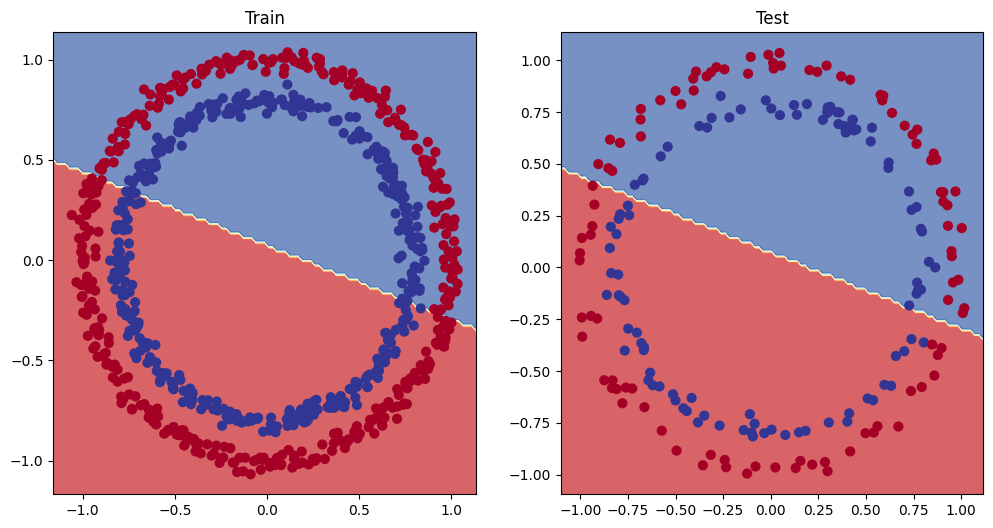

In [99]:
# Plot decsion boundry of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)

plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

### 2.6 Improving a model

In [100]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x):
    # z = self.layer_1(x)
    # z = self.layer_2(z)
    # z = self.layer_3(z)
    # Speed up pytorch : do all the above in one line
    return self.layer_3(self.layer_2(self.layer_1(x)))


# instace of modelV1 
model_1 = CircleModelV1()
model_1 


CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [101]:
# Loss funciot 
loss_fn = nn.BCEWithLogitsLoss()

# Ptimizer
optimizer = torch.optim.SGD(params= model_1.parameters(), lr=0.1)

In [102]:
# Write training and evaluation for model_1
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#train for longer
epochs = 1000

# Put data on the target device
model_1.to(device)
X_train , y_train = X_train.to(device) , y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device) 

# Loop
for epoch in range(epochs):
  #Training mode
  model_1.train()

  # forward pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # Calculate loss and acc
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true= y_train,
                    y_pred=y_pred)
  
  #optimizer zero grad
  optimizer.zero_grad()

  # loss backward
  loss.backward()

  # optimizer step
  optimizer.step()


  ### Testing

  model_1.eval()
  with torch.inference_mode():
    # forward pass
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # Calculating loss and acc
    test_loss = loss_fn(test_logits,
        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)
    

    # print out 
    if epoch % 100 ==0:
      
      print(f"Epoch: {epoch} | Loss: {loss:.5f} Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%.")




Epoch: 0 | Loss: 0.69396 Acc: 50.88% | Test Loss: 0.69261, Test acc: 51.00%.
Epoch: 100 | Loss: 0.69305 Acc: 50.38% | Test Loss: 0.69379, Test acc: 48.00%.
Epoch: 200 | Loss: 0.69299 Acc: 51.12% | Test Loss: 0.69437, Test acc: 46.00%.
Epoch: 300 | Loss: 0.69298 Acc: 51.62% | Test Loss: 0.69458, Test acc: 45.00%.
Epoch: 400 | Loss: 0.69298 Acc: 51.12% | Test Loss: 0.69465, Test acc: 46.00%.
Epoch: 500 | Loss: 0.69298 Acc: 51.00% | Test Loss: 0.69467, Test acc: 46.00%.
Epoch: 600 | Loss: 0.69298 Acc: 51.00% | Test Loss: 0.69468, Test acc: 46.00%.
Epoch: 700 | Loss: 0.69298 Acc: 51.00% | Test Loss: 0.69468, Test acc: 46.00%.
Epoch: 800 | Loss: 0.69298 Acc: 51.00% | Test Loss: 0.69468, Test acc: 46.00%.
Epoch: 900 | Loss: 0.69298 Acc: 51.00% | Test Loss: 0.69468, Test acc: 46.00%.


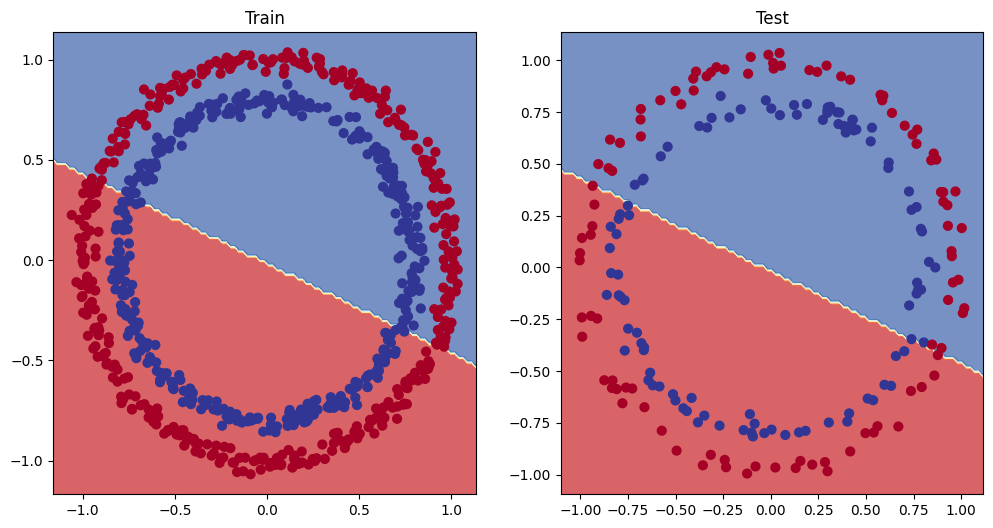

In [103]:
# Plot decsion boundry of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)

plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

### 2.7 solve smaller problems

In [104]:
# Create some data 
weight = 0.7
bias = 0.3
start = 0
end =1 
step = 0.01

# Create data 
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias

# Check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [105]:
# Create train and test split
train_split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split: ]
len(X_train_regression), len(y_train_regression), len(X_test_regression), len(y_test_regression) 

(80, 80, 20, 20)

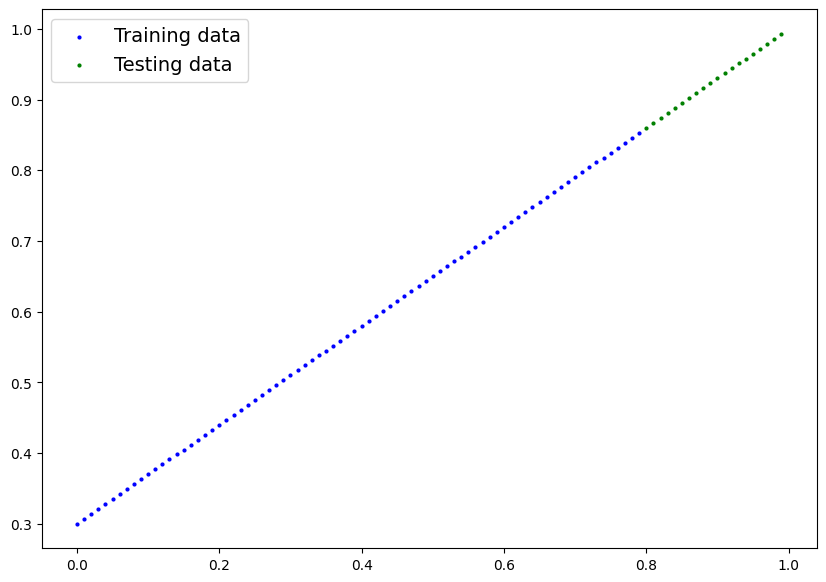

In [106]:
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression, 
                 test_labels=y_test_regression)

###2.8 adjust our model to new dataset

In [107]:

model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [108]:
# Loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_2.parameters(),
                            lr=0.01)

In [109]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs=1000

X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

for epoch in range(epochs):
  model_2.train()

  y_pred = model_2(X_train_regression)
  loss = loss_fn(y_pred, y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  ## Testing
  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test_regression)
    test_loss = loss_fn(test_pred, y_test_regression)

    if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f} |Test Loss: {test_loss:.5f}")




Epoch: 0 | Loss: 0.75986 |Test Loss: 0.91103
Epoch: 100 | Loss: 0.02858 |Test Loss: 0.00081
Epoch: 200 | Loss: 0.02533 |Test Loss: 0.00209
Epoch: 300 | Loss: 0.02137 |Test Loss: 0.00305
Epoch: 400 | Loss: 0.01964 |Test Loss: 0.00341
Epoch: 500 | Loss: 0.01940 |Test Loss: 0.00387
Epoch: 600 | Loss: 0.01903 |Test Loss: 0.00379
Epoch: 700 | Loss: 0.01878 |Test Loss: 0.00381
Epoch: 800 | Loss: 0.01840 |Test Loss: 0.00329
Epoch: 900 | Loss: 0.01798 |Test Loss: 0.00360


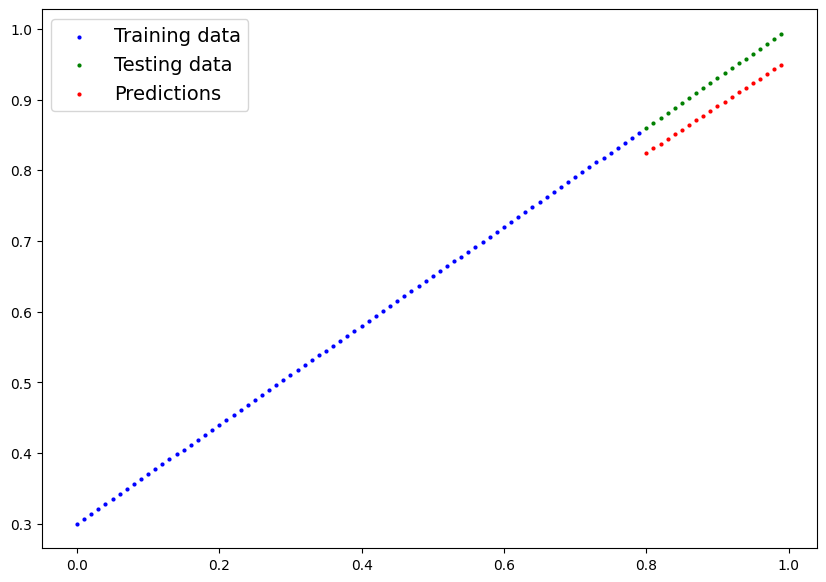

In [110]:
model_2.eval()

with torch.inference_mode():
  y_pred = model_2(X_test_regression)

plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(), 
                 test_labels=y_test_regression.cpu(),
                  predictions=y_pred.cpu())


### 2.9 none_linearity

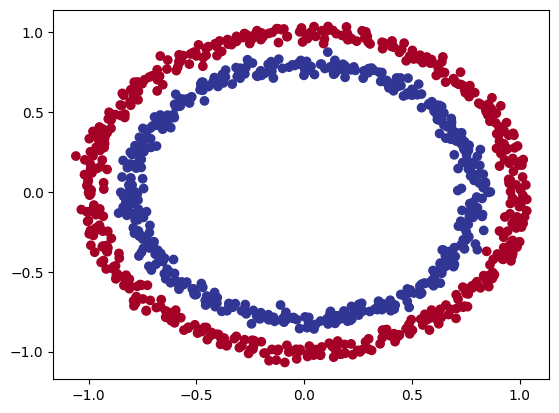

In [111]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples =1000

X, y = make_circles(n_samples, 
                    noise=0.03,
                    random_state=42)
plt.scatter(X[:,0], X[:,1], c=y, cmap= plt.cm.RdYlBu)

In [112]:
# Convert data to tensors and then train and test split
import torch 
from sklearn.model_selection import train_test_split

# turn data to tensor
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)
X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

In [113]:
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU() # non_linear activation function


  def forward(self,x):
    # where should we put the activation function
    return self.layer_3(
        self.relu(
            self.layer_2(
                self.relu(
                    self.layer_1(x) ))))
                        
# instance of model 
model_3 =CircleModelV2()
model_3 
                

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [114]:
# Set up loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model_3.parameters(),
                            lr=0.1)

In [115]:
# Torch random seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 2000
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)
model_3.to(device)

for epoch in range(epochs):
  model_3.train()

  y_logits = model_3(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train, y_pred=y_preds)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_3.eval()

  with torch.inference_mode():
      y_logits_test = model_3(X_test).squeeze()
      y_preds_test = torch.round(torch.sigmoid(y_logits_test))

      test_loss = loss_fn(y_logits_test, y_test)
      test_acc = accuracy_fn(y_true=y_test, y_pred=y_preds_test)

      if epoch % 100 ==0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f} Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%.")

     

Epoch: 0 | Loss: 0.69295 Acc: 50.00% | Test Loss: 0.69319, Test acc: 50.00%.
Epoch: 100 | Loss: 0.69115 Acc: 52.88% | Test Loss: 0.69102, Test acc: 52.50%.
Epoch: 200 | Loss: 0.68977 Acc: 53.37% | Test Loss: 0.68940, Test acc: 55.00%.
Epoch: 300 | Loss: 0.68795 Acc: 53.00% | Test Loss: 0.68723, Test acc: 56.00%.
Epoch: 400 | Loss: 0.68517 Acc: 52.75% | Test Loss: 0.68411, Test acc: 56.50%.
Epoch: 500 | Loss: 0.68102 Acc: 52.75% | Test Loss: 0.67941, Test acc: 56.50%.
Epoch: 600 | Loss: 0.67515 Acc: 54.50% | Test Loss: 0.67285, Test acc: 56.00%.
Epoch: 700 | Loss: 0.66659 Acc: 58.38% | Test Loss: 0.66322, Test acc: 59.00%.
Epoch: 800 | Loss: 0.65160 Acc: 64.00% | Test Loss: 0.64757, Test acc: 67.50%.
Epoch: 900 | Loss: 0.62362 Acc: 74.00% | Test Loss: 0.62145, Test acc: 79.00%.
Epoch: 1000 | Loss: 0.56818 Acc: 87.75% | Test Loss: 0.57378, Test acc: 86.50%.
Epoch: 1100 | Loss: 0.48153 Acc: 93.50% | Test Loss: 0.49935, Test acc: 90.50%.
Epoch: 1200 | Loss: 0.37056 Acc: 97.75% | Test Loss:

### 2.10 evaluate the model, trained with non_linear activation functions

In [116]:
model_3.eval()
with torch.inference_mode():
  y_eval_pred = torch.round(torch.sigmoid(model_3(X_test))).squeeze()

y_eval_pred[:10], y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

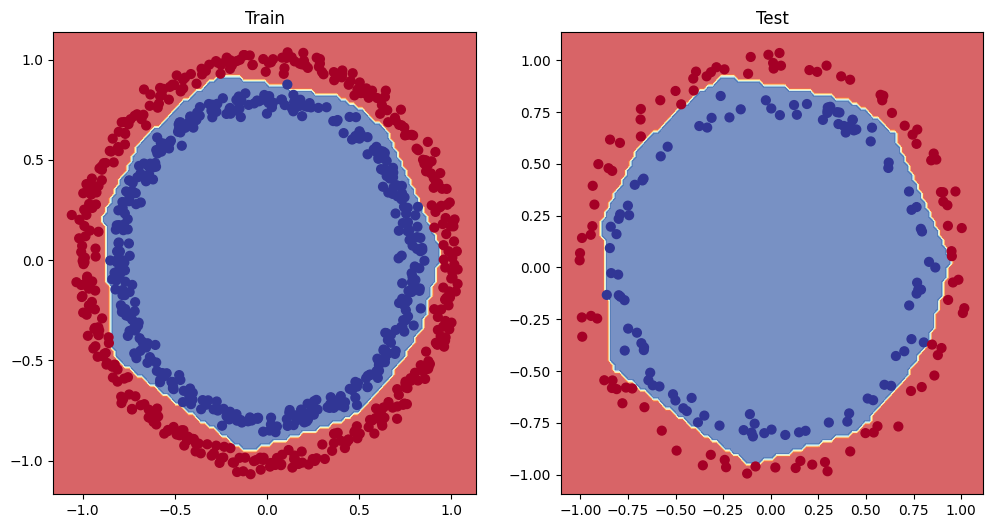

In [117]:
# Plot decsion boundry of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)

plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

##3. Replicate non_linear activation functions

In [118]:
A = torch.arange(-10,10,1,dtype=torch.float32)
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

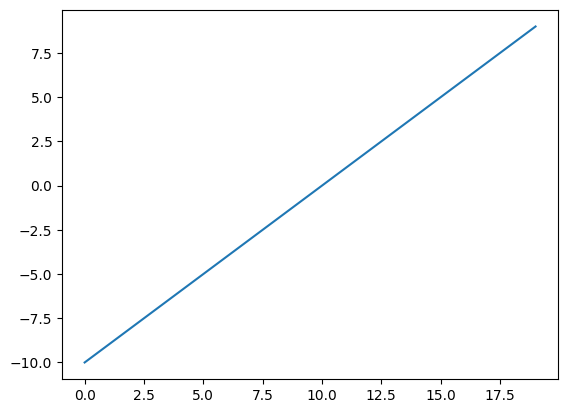

In [119]:
plt.plot(A)

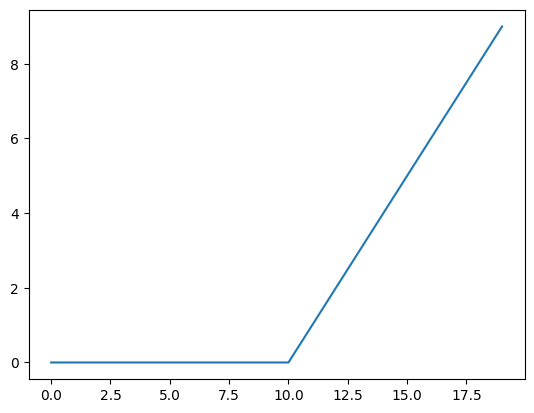

In [120]:
plt.plot(torch.relu(A))

In [121]:
def relu(x):
  return torch.maximum(torch.tensor(0), x)

In [122]:
relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

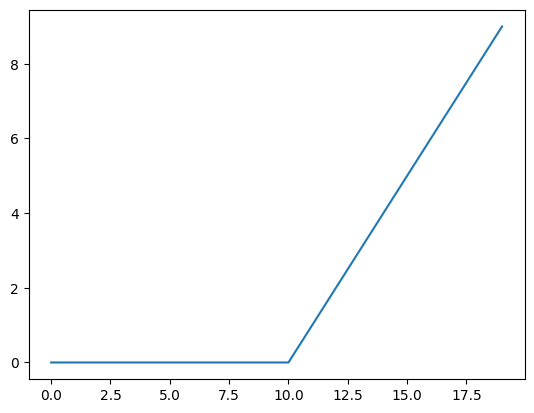

In [123]:
plt.plot(relu(A))

In [124]:
def sigmoid(x):
  return 1/(1 + torch.exp(-x))

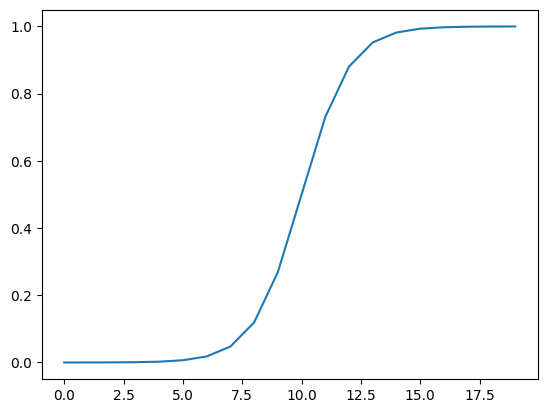

In [125]:
plt.plot(torch.sigmoid(A))

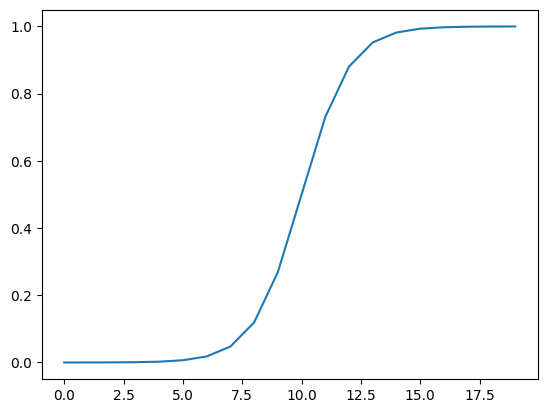

In [126]:
plt.plot(sigmoid(A))

## 4. MultiClass classifier

###4.1 Data

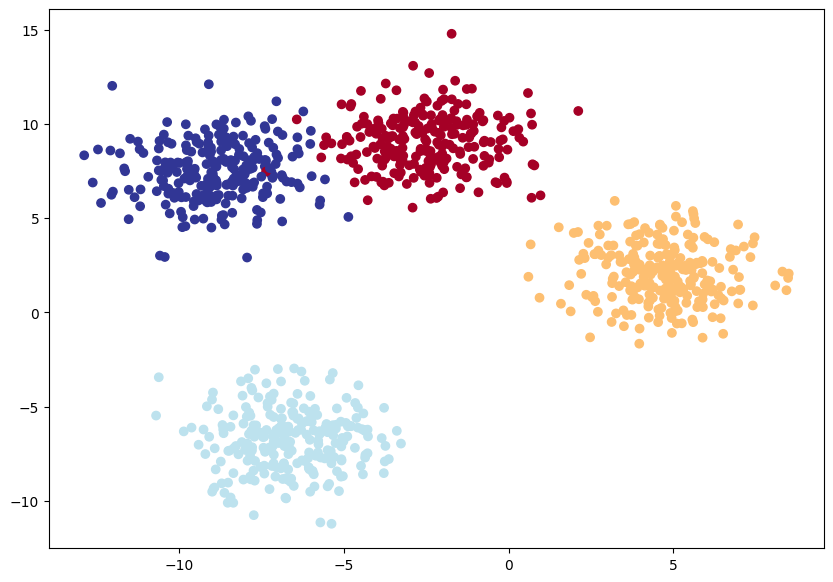

In [151]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameter

NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED =42

# Create multi class data
X_blob , y_blob = make_blobs(
    n_samples=1000,
    n_features=NUM_FEATURES,
    centers=NUM_CLASSES,
    cluster_std= 1.5,
    random_state=RANDOM_SEED
)

# turn data to tensor
X_blob , y_blob = torch.from_numpy(X_blob).type(torch.float) , torch.from_numpy(y_blob).type(torch.LongTensor)

# Split train and test
X_train_blob, X_test_blob , y_train_blob, y_test_blob = train_test_split(X_blob , 
                                                                         y_blob,
                                                                         test_size=0.2,
                                                                         random_state=RANDOM_SEED)
# Plot the data
plt.figure(figsize=(10, 7))

plt.scatter(X_blob[:,0], X_blob[:,1] , c=y_blob, cmap=plt.cm.RdYlBu)

In [152]:
len(X_train_blob), len(X_test_blob) , len(y_train_blob), len(y_test_blob)

(800, 200, 800, 200)

Text(0.5, 1.0, 'test')

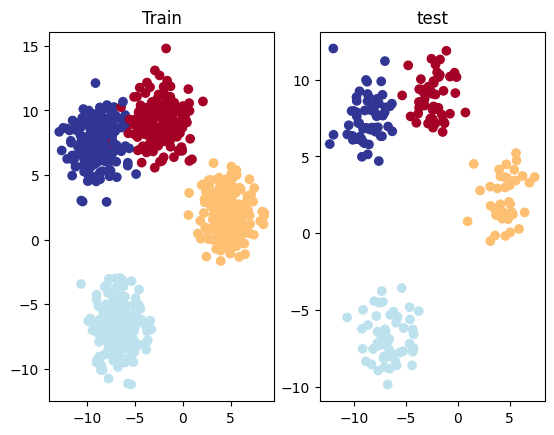

In [153]:
plt.subplot(1, 2, 1)
plt.scatter(X_train_blob[:,0], X_train_blob[:,1] , c=y_train_blob, cmap=plt.cm.RdYlBu)
plt.title("Train")
plt.subplot(1, 2, 2)
plt.scatter(X_test_blob[:,0], X_test_blob[:,1] , c=y_test_blob, cmap=plt.cm.RdYlBu)
plt.title("test")

In [154]:
X_train_blob[:5], X_test_blob[:5] , y_train_blob[:5], y_test_blob[:5]

(tensor([[ 5.0405,  3.3076],
         [-2.6249,  9.5260],
         [-8.5240, -9.0402],
         [-6.0262, -4.4375],
         [-3.3397,  7.2175]]),
 tensor([[ 4.6675,  4.4878],
         [-7.9969,  6.8803],
         [-6.2801, -7.8571],
         [ 3.6833,  1.1767],
         [-0.1404, 10.1654]]),
 tensor([1, 0, 2, 2, 0]),
 tensor([1, 3, 2, 1, 0]))

### 4.2 Multi class classification model in pytorch

In [155]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [168]:
# Model building
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    """ Initialize multi-class classification model.
              Arges:
                        input_features  (int): Number of input features to the model
                        output_features (int): Number of outputs features (number of classes)
                        hidden_units    (int): Number of hidden units, default is 8

              Return:
                        self.linear_layer_stack(x)

              Examples:
                        BlobModel(input_features=2, 
                              output_features=4,
                              hidden_units=8)
    """
    super().__init__()

    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )


  def forward(self, x):
    return self.linear_layer_stack(x)



# instance of model

model_4 = BlobModel(input_features=2, 
                    output_features=4,
                    hidden_units=8).to(device)


model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

### 4.3 Create loss function and optimizer

In [169]:
# loss function setting
loss_fn = nn.CrossEntropyLoss()

# optimizer setting
optimizer = torch.optim.SGD(params=model_4.parameters(),
                            lr=0.1)

###4.4 Getting prediction probabilities for a multi class classification
Logits (raw output of model) -> Probablities (`torch.softmax()`) -> label probs (`torch.argmax()`)

In [170]:
X_train_blob, X_test_blob , y_train_blob, y_test_blob =X_train_blob.to(device), X_test_blob.to(device) , y_train_blob.to(device), y_test_blob.to(device)

In [171]:
model_4.eval()
with torch.inference_mode():
  y_preds_logits = model_4(X_train_blob)

y_preds_logits[:10]

tensor([[-0.7586, -0.6810, -1.5180, -1.1178],
        [-0.2398, -1.2335, -0.9858, -0.2899],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [ 0.2391, -0.2472,  0.1494,  0.0213],
        [-0.1214, -0.9804, -0.6918, -0.1923],
        [-0.2044, -1.1380, -0.9468, -0.3093],
        [-0.2613, -1.2852, -1.0251, -0.2935],
        [-0.5237, -0.5791, -1.1276, -0.8689],
        [-0.0423, -0.8228, -0.4666, -0.0986],
        [-0.1876, -1.1245, -0.8498, -0.2406]])

In [172]:
y_train_blob[:10]

tensor([1, 0, 2, 2, 0, 0, 0, 1, 3, 0])

In [173]:
# Convert our models's logits to prediction probablities
y_pred_prob = torch.softmax(y_preds_logits, dim=1)
print(y_preds_logits[:5])
print(y_pred_prob[:5])

tensor([[-0.7586, -0.6810, -1.5180, -1.1178],
        [-0.2398, -1.2335, -0.9858, -0.2899],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [ 0.2391, -0.2472,  0.1494,  0.0213],
        [-0.1214, -0.9804, -0.6918, -0.1923]])
tensor([[0.3080, 0.3328, 0.1441, 0.2150],
        [0.3577, 0.1324, 0.1696, 0.3402],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3000, 0.1845, 0.2743, 0.2413],
        [0.3424, 0.1450, 0.1936, 0.3190]])


In [174]:
torch.sum(y_pred_prob[0])

tensor(1.)

In [175]:
torch.max(y_pred_prob[0])

tensor(0.3328)

In [176]:
torch.argmax(y_pred_prob[0])

tensor(1)

In [177]:
# Convert our model's prediction probablities to prediction labels
y_preds = torch.argmax(y_pred_prob, dim= 1)
y_preds

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0,
        3, 0, 3, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 0, 0, 1, 0, 3, 1, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 1, 0, 1,
        0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
        0, 0, 0, 3, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [178]:
y_train_blob

tensor([1, 0, 2, 2, 0, 0, 0, 1, 3, 0, 0, 0, 3, 2, 3, 2, 1, 1, 3, 2, 2, 2, 3, 1,
        3, 2, 3, 0, 1, 0, 0, 1, 1, 3, 0, 2, 2, 1, 1, 3, 1, 1, 2, 3, 3, 0, 0, 0,
        1, 0, 0, 0, 2, 0, 1, 1, 0, 0, 2, 2, 3, 1, 0, 2, 1, 3, 2, 2, 2, 1, 0, 2,
        3, 1, 1, 1, 2, 0, 0, 1, 2, 3, 1, 3, 3, 2, 3, 3, 2, 2, 1, 0, 0, 1, 2, 1,
        3, 1, 2, 1, 3, 3, 3, 0, 2, 1, 2, 3, 1, 1, 2, 0, 3, 3, 2, 0, 2, 0, 3, 2,
        0, 0, 2, 2, 0, 1, 2, 0, 3, 3, 2, 3, 2, 1, 3, 1, 1, 1, 1, 0, 0, 1, 0, 2,
        3, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 2, 2, 0, 0, 3, 0, 3, 3, 3, 0, 2, 0, 1,
        2, 2, 2, 3, 0, 1, 1, 0, 1, 2, 0, 3, 2, 1, 3, 2, 3, 0, 3, 1, 1, 2, 2, 2,
        2, 2, 2, 0, 3, 3, 2, 1, 1, 2, 3, 1, 0, 0, 1, 3, 0, 1, 3, 3, 2, 3, 3, 3,
        1, 0, 0, 1, 0, 3, 2, 1, 0, 3, 0, 0, 3, 1, 0, 1, 0, 2, 2, 0, 0, 3, 3, 2,
        0, 2, 0, 3, 1, 3, 0, 2, 2, 0, 1, 1, 0, 2, 1, 1, 1, 0, 1, 3, 1, 1, 0, 2,
        2, 3, 1, 0, 1, 2, 3, 1, 2, 0, 3, 1, 3, 3, 3, 0, 3, 3, 3, 2, 3, 3, 1, 0,
        2, 2, 2, 2, 3, 1, 2, 2, 0, 2, 3,

### 4.5 Creating training loops and testing loops

In [179]:
# Fit the multi class model to the data
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Setting the epochs
epochs =100

# Put data to the device
X_train_blob, X_test_blob , y_train_blob, y_test_blob =X_train_blob.to(device), X_test_blob.to(device) , y_train_blob.to(device), y_test_blob.to(device)

# Loop through data
for epoch in range(epochs):
  model_4.train()

  y_logits = model_4(X_train_blob)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  loss = loss_fn(y_logits , y_train_blob)
  acc = accuracy_fn(y_train_blob, y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_4.eval()

  with torch.inference_mode():
    y_test_logits = model_4(X_test_blob)
    y_test_pred = torch.softmax(y_test_logits, dim=1).argmax(dim=1)
    
    test_loss = loss_fn(y_test_logits , y_test_blob)
    test_acc = accuracy_fn(y_test_blob, y_test_pred)
    
    if epoch % 10 ==0:

      print(f"Epoch: {epoch} | Loss: {loss:.5f} Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%.")





Epoch: 0 | Loss: 1.15883 Acc: 40.38% | Test Loss: 1.07554, Test acc: 48.00%.
Epoch: 10 | Loss: 0.64476 Acc: 96.75% | Test Loss: 0.66069, Test acc: 97.50%.
Epoch: 20 | Loss: 0.42535 Acc: 98.50% | Test Loss: 0.43074, Test acc: 100.00%.
Epoch: 30 | Loss: 0.25294 Acc: 99.12% | Test Loss: 0.24508, Test acc: 99.50%.
Epoch: 40 | Loss: 0.11232 Acc: 99.25% | Test Loss: 0.10229, Test acc: 99.50%.
Epoch: 50 | Loss: 0.06627 Acc: 99.25% | Test Loss: 0.05848, Test acc: 99.50%.
Epoch: 60 | Loss: 0.05068 Acc: 99.25% | Test Loss: 0.04293, Test acc: 99.50%.
Epoch: 70 | Loss: 0.04300 Acc: 99.25% | Test Loss: 0.03491, Test acc: 99.50%.
Epoch: 80 | Loss: 0.03836 Acc: 99.25% | Test Loss: 0.02988, Test acc: 99.50%.
Epoch: 90 | Loss: 0.03525 Acc: 99.25% | Test Loss: 0.02663, Test acc: 99.50%.


### 4.6 Evaluating multi class model

In [181]:
model_4.eval()

with torch.inference_mode():
  y_eval_logits = model_4(X_test_blob)

y_eval_logits[:10]


tensor([[-0.6249,  5.9860, -7.6323, -8.4470],
        [-2.1738, -6.3750, -3.7202,  3.1203],
        [-3.4102, -3.8958,  3.1567, -2.6119],
        [-1.1505,  4.1962, -3.8472, -4.8820],
        [ 3.7548, -1.3391, -9.1422, -6.9466],
        [-2.8211, -7.5767, -4.2944,  3.7944],
        [-3.0306, -3.3328,  2.7955, -2.1374],
        [ 3.3761, -4.0375, -6.8987, -3.5503],
        [-4.3620, -4.9904,  3.8123, -3.3814],
        [ 3.5012, -3.0281, -7.5401, -4.7064]])

In [183]:
y_eval_pred_probs = torch.softmax(y_eval_logits, dim=1)
y_eval_pred_probs[:10]

tensor([[1.3437e-03, 9.9865e-01, 1.2164e-06, 5.3854e-07],
        [4.9905e-03, 7.4740e-05, 1.0630e-03, 9.9387e-01],
        [1.3985e-03, 8.6060e-04, 9.9463e-01, 3.1073e-03],
        [4.7389e-03, 9.9483e-01, 3.1956e-04, 1.1353e-04],
        [9.9388e-01, 6.0966e-03, 2.4904e-06, 2.2378e-05],
        [1.3372e-03, 1.1504e-05, 3.0644e-04, 9.9834e-01],
        [2.9138e-03, 2.1537e-03, 9.8781e-01, 7.1181e-03],
        [9.9838e-01, 6.0198e-04, 3.4435e-05, 9.7989e-04],
        [2.8147e-04, 1.5016e-04, 9.9882e-01, 7.5044e-04],
        [9.9825e-01, 1.4575e-03, 1.5997e-05, 2.7210e-04]])

In [185]:
y_preds = torch.argmax(y_eval_pred_probs, dim=1)
y_preds[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [186]:
y_test_blob[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

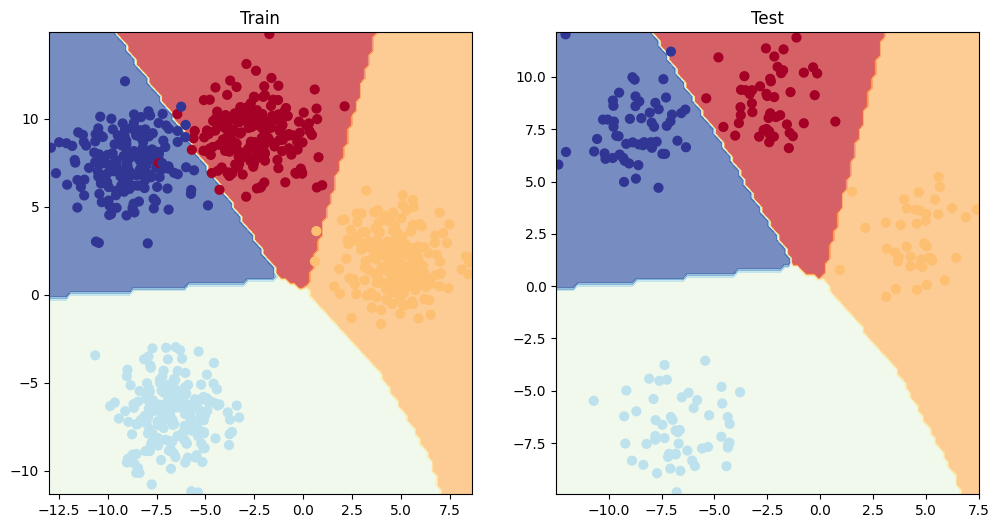

In [189]:
# Plot decsion boundry of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_train_blob, y_train_blob)

plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_test_blob, y_test_blob)

###4.7 without activation function




In [190]:
# Model building
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    """ Initialize multi-class classification model.
              Arges:
                        input_features  (int): Number of input features to the model
                        output_features (int): Number of outputs features (number of classes)
                        hidden_units    (int): Number of hidden units, default is 8

              Return:
                        self.linear_layer_stack(x)

              Examples:
                        BlobModel(input_features=2, 
                              output_features=4,
                              hidden_units=8)
    """
    super().__init__()

    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        # nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        # nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )


  def forward(self, x):
    return self.linear_layer_stack(x)



# instance of model

model_5 = BlobModel(input_features=2, 
                    output_features=4,
                    hidden_units=8).to(device)


model_5

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [195]:
# loss function setting
loss_fn = nn.CrossEntropyLoss()

# optimizer setting
optimizer = torch.optim.SGD(params=model_5.parameters(),
                            lr=0.1)

In [196]:
# Fit the multi class model to the data
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Setting the epochs
epochs =100

# Put data to the device
X_train_blob, X_test_blob , y_train_blob, y_test_blob =X_train_blob.to(device), X_test_blob.to(device) , y_train_blob.to(device), y_test_blob.to(device)

# Loop through data
for epoch in range(epochs):
  model_5.train()

  y_logits = model_5(X_train_blob)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  loss = loss_fn(y_logits , y_train_blob)
  acc = accuracy_fn(y_train_blob, y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_5.eval()

  with torch.inference_mode():
    y_test_logits = model_5(X_test_blob)
    y_test_pred = torch.softmax(y_test_logits, dim=1).argmax(dim=1)
    
    test_loss = loss_fn(y_test_logits , y_test_blob)
    test_acc = accuracy_fn(y_test_blob, y_test_pred)
    
    if epoch % 10 ==0:

      print(f"Epoch: {epoch} | Loss: {loss:.5f} Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%.")

Epoch: 0 | Loss: 1.92116 Acc: 26.00% | Test Loss: 0.85459, Test acc: 55.00%.
Epoch: 10 | Loss: 0.28521 Acc: 97.12% | Test Loss: 0.23787, Test acc: 98.00%.
Epoch: 20 | Loss: 0.11618 Acc: 99.00% | Test Loss: 0.10434, Test acc: 98.50%.
Epoch: 30 | Loss: 0.07650 Acc: 99.00% | Test Loss: 0.06791, Test acc: 98.50%.
Epoch: 40 | Loss: 0.06006 Acc: 99.00% | Test Loss: 0.05209, Test acc: 99.00%.
Epoch: 50 | Loss: 0.05133 Acc: 99.00% | Test Loss: 0.04346, Test acc: 99.00%.
Epoch: 60 | Loss: 0.04599 Acc: 99.00% | Test Loss: 0.03807, Test acc: 99.50%.
Epoch: 70 | Loss: 0.04242 Acc: 99.00% | Test Loss: 0.03440, Test acc: 99.50%.
Epoch: 80 | Loss: 0.03989 Acc: 99.00% | Test Loss: 0.03174, Test acc: 99.50%.
Epoch: 90 | Loss: 0.03800 Acc: 99.00% | Test Loss: 0.02972, Test acc: 99.50%.


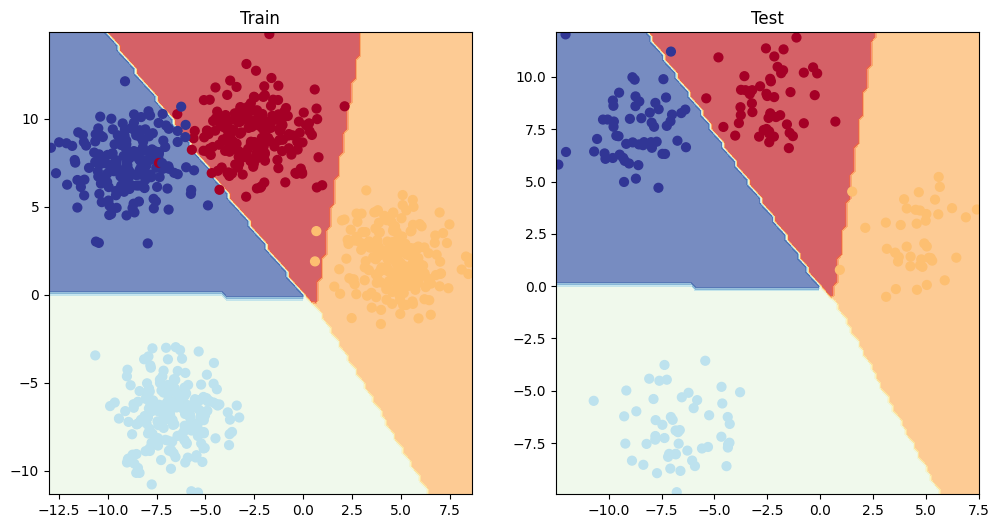

In [197]:
# Plot decsion boundry of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_5, X_train_blob, y_train_blob)

plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_5, X_test_blob, y_test_blob)

In [198]:
!pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 KB 13.8 MB/s eta 0:00:00


### 4.8 Accuracy (torchmetrics)

In [200]:
from torchmetrics import Accuracy

torchmetrics_accuracy = Accuracy(task="multiclass", num_classes=4).to(device)


torchmetrics_accuracy(y_eval_pred_probs, y_test_blob)

tensor(0.9950)